<h2> Context </h2>

The number of restaurants is increasing day by day. Lots of students and busy
professionals rely on those restaurants due to their hectic lifestyles. Online food delivery
service is a great option for them. It provides them with good food from their favorite
restaurants. A food aggregator company FoodHub offers access to multiple restaurants
through a single smartphone app.
The app allows restaurants to receive a direct online order from a customer. The app
assigns a delivery person from the company to pick up the order after it is confirmed by
the restaurant. The delivery person then uses the map to reach the restaurant and waits
for the food package. Once the food package is handed over to the delivery person,
he/she confirms the pick-up in the app and travels to the customer's location to deliver
the food. The delivery person confirms the drop-off in the app after delivering the food
package to the customer. The customer can rate the order in the app. The food
aggregator earns money by collecting a fixed margin on the delivery order from the
restaurants.

<h2> Objective </h2>

The food aggregator company has stored the data of the different orders made by the
registered customers in their online portal. They want to analyze the data to get a fair
idea about the demand of different restaurants which will help them in enhancing their
customer experience. Suppose you are hired as a Data Scientist in this company and the
Data Science team has shared some of the key questions that need to be answered.
Perform the data analysis to find answers to these questions that will help the company
improve its business.


<h2> Data Description </h2>

- order_id: Unique ID of the order
- customer_id: ID of the customer who ordered the food
- restaurant_name: Name of the restaurant
- cuisine_type: Cuisine ordered by the customer
- cost: Cost of the order
- day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
- rating: Rating given by the customer out of 5
- food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
- delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [6]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<h3> Loading the dataset </h3>

In [7]:
df=pd.read_csv(r'C:\Users\b84266591\Desktop\Tech\MJ TINGS\restaurants.csv')
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


<h3> Exploratory Data Analysis (EDA) </h3>

In [5]:
# How many columns and rows do we have
df.shape

(1898, 9)

In [6]:
# Checking for null values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

As we see, we have no null values in our dataset

In [9]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


<h3> 1. What are your general thoughts on the dataset? How would you describe the data? </h3>

- On the **nature of data**; the dataset appears to have transactional data capturing information about individual food orders placed by customers at various restaurants. It includes details such as order_id, customer_id, restaurant names, cusine_types, etc

- On the **completeness of data**, there are no missing values so far. Hence, we can say that the data is ready for analysis.

- On the **diversity of data**; the dataset seems to be better diversed since it contains both categorical variables and numerical variables.

<h3> 2. Find the summary statistics and write your observations based on that. </h3>

In [11]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


<h4> Making observations based on the summary statistics above: </h4>

- The **mean cost of orders is 16.49 dollars** with a median cost of 14.14 dollars. The cost of orders varies from 4.47 dollars to 35.41 dollars, indicating a wide range of prices. The standard deviation of 7.4838 suggests variability in order costs.

- The **average food preparation time is 27.37 minutes**, with a median time of 27 minutes. Food preparation varies varies from 20 minutes to 35 minutes, indicating differences in restaurant efficiency. The standard deviation of 4.632 suggests variability in preparation times.

- The **average delivery time is 24.16 minutes**, and the median is 25 minutes. Delivery times range from 15 minutes to 30 minutes maximum, indicating variations in delivery efficiency. 

<h3> 3. What are your thoughts on the categorical variables? </h3>

The categorical variables in the dataset can provide valuable insights into various aspects of the data, including customer preferences, restaurant characteristics, and other patterns. Here are some thoughts:

- **restaurant_name:** The variable represents the names of different restaurants. It can be used to analyze which restaurants are most popular, which ones have high ratings, and if there are any trends or patterns in customer choices based on the restaurant names.

- **cuisine type:** The cuisine type ordered ordered by customers can be used to identify the most popular cuisines and even explore relationships between cuisine type and customer ratings.

- **day_of_the_week:** This variable categorizes orders based on whether they were placed on a weekday or weekend. it allows for analysis of temporal patterns, such as whether orders or ratings differ between weekdays and weekends.

<h3> 4. How many orders are not rated? Please show how you arrived at this </h3>

In [18]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

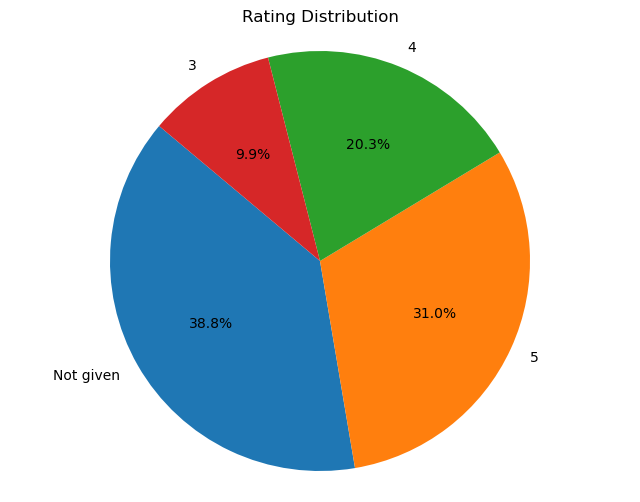

In [14]:
x=df['rating'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=140)
plt.title('Rating Distribution')
plt.axis('equal') #equal aspect ratio ensures that the pie chart is circular

plt.show()

According to the pie chart, the **Not given** ratings constitute to **38.8%** of the total orders which are **736**.

<h3> 5. Explore all the variables and provide observations on the distributions of all the
relevant variables in the dataset. </h3>

In [15]:
df.head() # To get an overview of the first 5 rows in the dataset

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


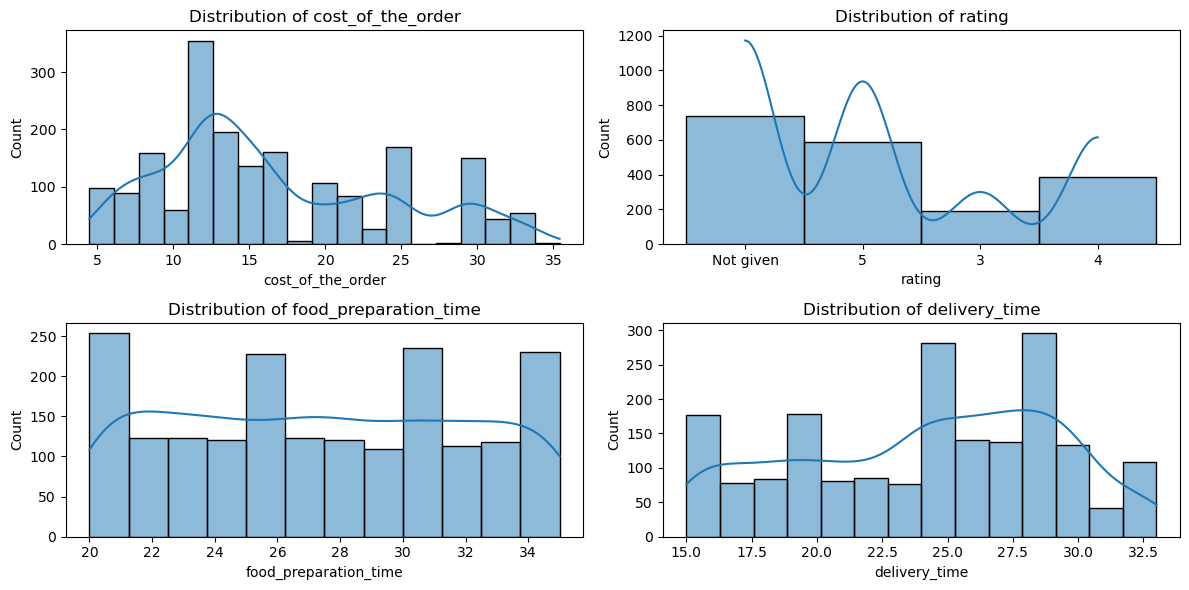

In [17]:
# Distribution for numerical variables
num_cols=['cost_of_the_order','rating','food_preparation_time','delivery_time']

plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

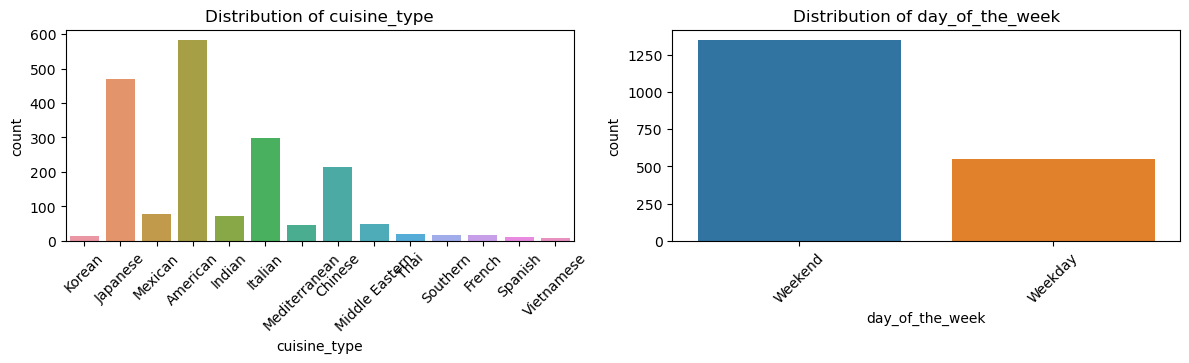

In [21]:
# Distribution of categorical variables
categorical_cols=['cuisine_type','day_of_the_week']

plt.figure(figsize=(12,6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

According to the distribution of categorical variables, on the type of cuisine dishes, people prefer, **Japanese**, **American**, **Italian** and **Mediterranean** dishes, who are top on the list.

And also most cuisines are ordered on the **weekend** than on the **weekday**.

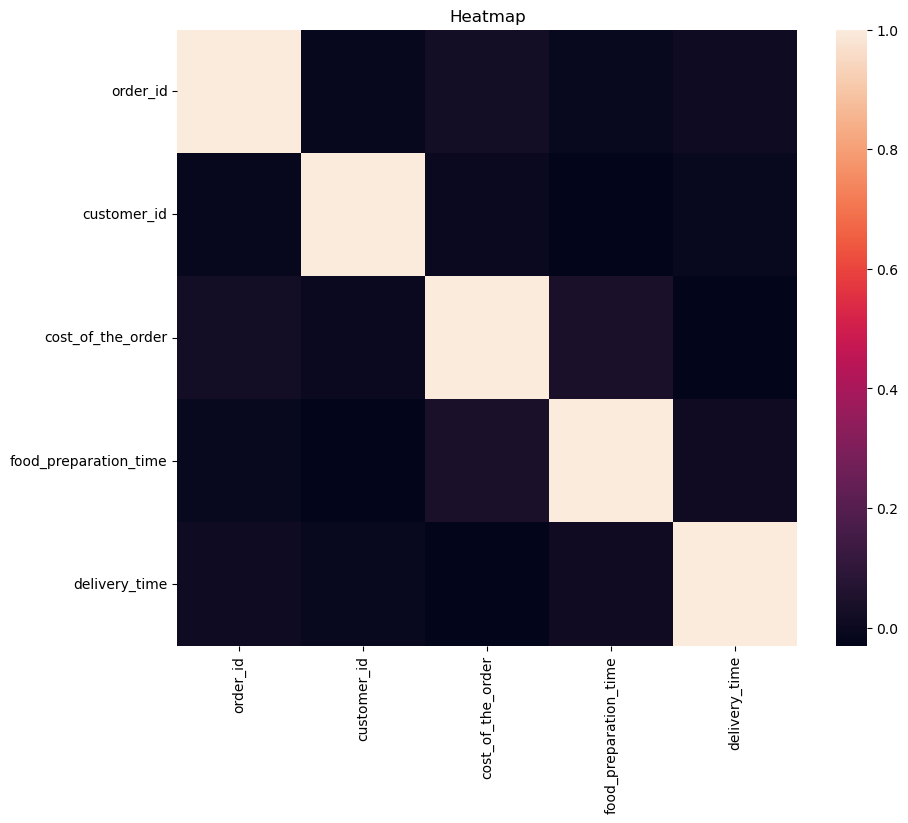

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), linecolor='red')
plt.axis('tight')
plt.title('Heatmap')
plt.show()

In [30]:
df.corr()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


This shows there is no correlation between the variables.

<h3>6. Which are the top 5 restaurants that have received the highest number of orders? </h3>

In [32]:
top_5=pd.DataFrame(df['restaurant_name'].value_counts().head(5))
top_5

,restaurant_name
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


<Figure size 1000x600 with 0 Axes>

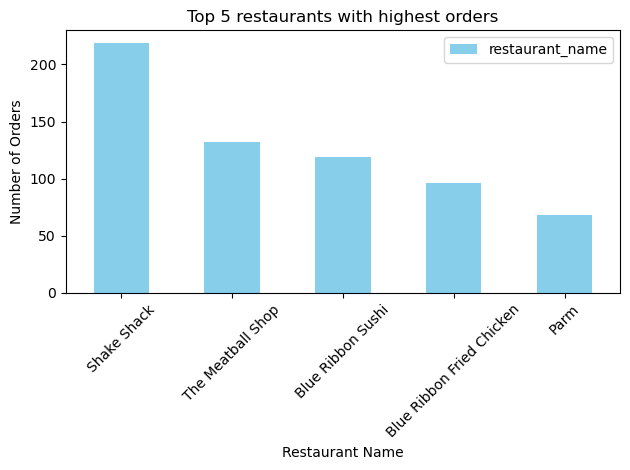

In [35]:
plt.figure(figsize=(10,6))

top_5.plot(kind='bar', color='skyblue')
plt.title('Top 5 restaurants with highest orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h3> 7. Which is the most popular cuisine on weekends. Explain how you arrived at this </h3>

In [44]:
weekend_orders=df[df['day_of_the_week'].isin(['Weekend'])]

popular_cuisine=weekend_orders['cuisine_type'].value_counts()
popular_cuisine # This outputs all popular cuisines on the weekend orders

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

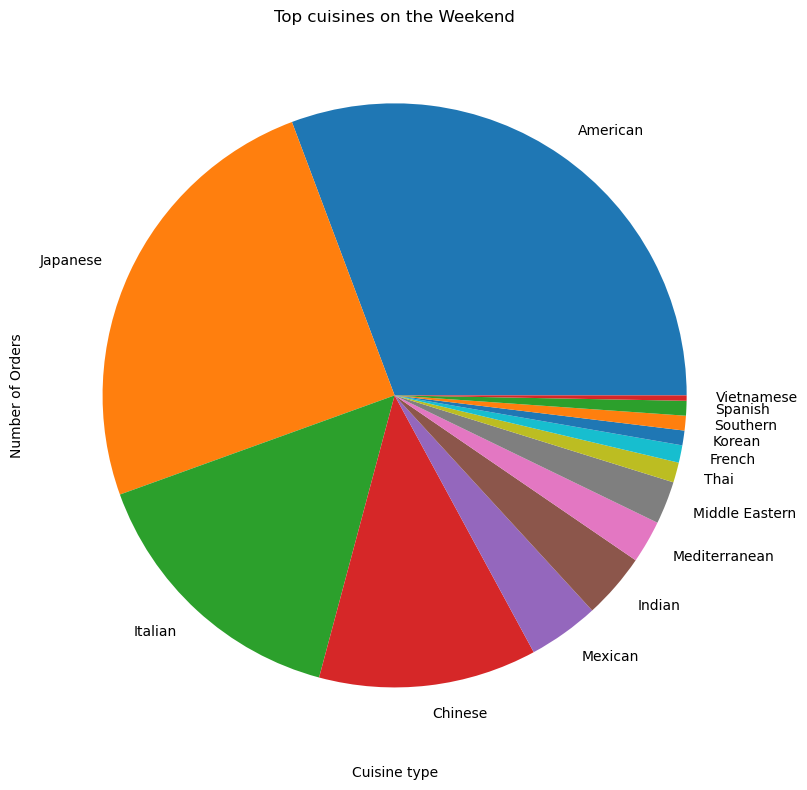

In [76]:
# Printing only the top 3 most popular cuisine on weekend
popular_cuisine.head(3)

# Create a chart to visualize the top three
plt.figure(figsize=(10,8))
popular_cuisine.plot(kind='pie')
plt.title('Top cuisines on the Weekend')
plt.xlabel('Cuisine type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h3> 8. How many orders had a total cost of above 20 dollars? What is the percentage of
such orders in the dataset? </h3>

In [53]:
# Calculate the total cost for each order
df['total_cost']=df.groupby('order_id')['cost_of_the_order'].transform('sum')

#Count number of orders with a total cost of above $20
above_20=len(df[df['total_cost']>20])
print(f'Number of orders above 20 dollars are: {above_20}')

#Calculate the percentage of such orders
total_orders=len(df)
percentage_above_20=(above_20/total_orders)*100
print(f'Percentage of such orders in the dataset: {percentage_above_20:.2f} %')

Number of orders above 20 dollars are: 555
Percentage of such orders in the dataset: 29.24 %


<h3> 9. Find the mean delivery time based on this dataset. </h3>

In [54]:
mean_delivery=df['delivery_time'].mean()

print(f'The mean delivery time is: {mean_delivery:.2f} minutes')

The mean delivery time is: 24.16 minutes


<h3> 10. Suppose the company has decided to give a free coupon of 15 dollars to the
customer who has spent the maximum amount on a single order. Find the ID of
the customer along with the order details. </h3>

In [64]:
# Calculate the total cost for each order 
df['total_cost']=df.groupby('order_id')['cost_of_the_order'].transform('sum')

# Find the order with the maximum cost
max_cost=df['total_cost'].max()

# Extract the customer ID and order details
#customer_id=max_cost['customer_id']
#order_details=max_cost[['order_id','restaurant_name','cuisine_type','cost_of_the_order','day_of_the_week','rating','food_preparation_time','delivery_time']]

#print(f'Customer ID with the maximum single order cost: {customer_id}')
print('Order Details: ')
#print(order_details)

Order Details: 


<h3> 11. Perform bivariate analysis to explore relationships between the important
variables in the dataset. </h3>

I will use a scatter plot to explore relationships between two numerical variables. And also check the strengths and direction of the relationship.
Scatter plot between food preparation time and delivery time

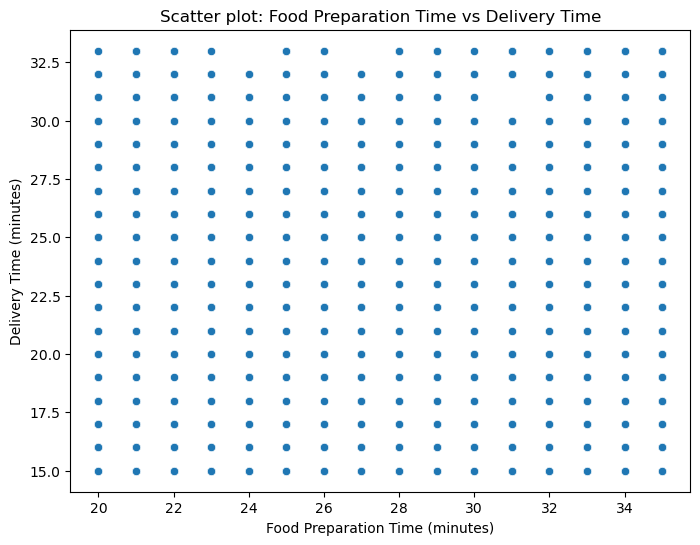

Correlation coefficient: 0.01


In [65]:
# Scatter plot between food preparation time and delivery time
plt.figure(figsize=(8,6))

sns.scatterplot(data=df, x='', y='delivery_time')
plt.title('Scatter plot: Food Preparation Time vs Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Calculate correlation between the two variables
corr=df['food_preparation_time'].corr(df['delivery_time'])
print(f'Correlation coefficient: {corr:.2f}')

<h5> Box plot of rating by cuisine type </h5>

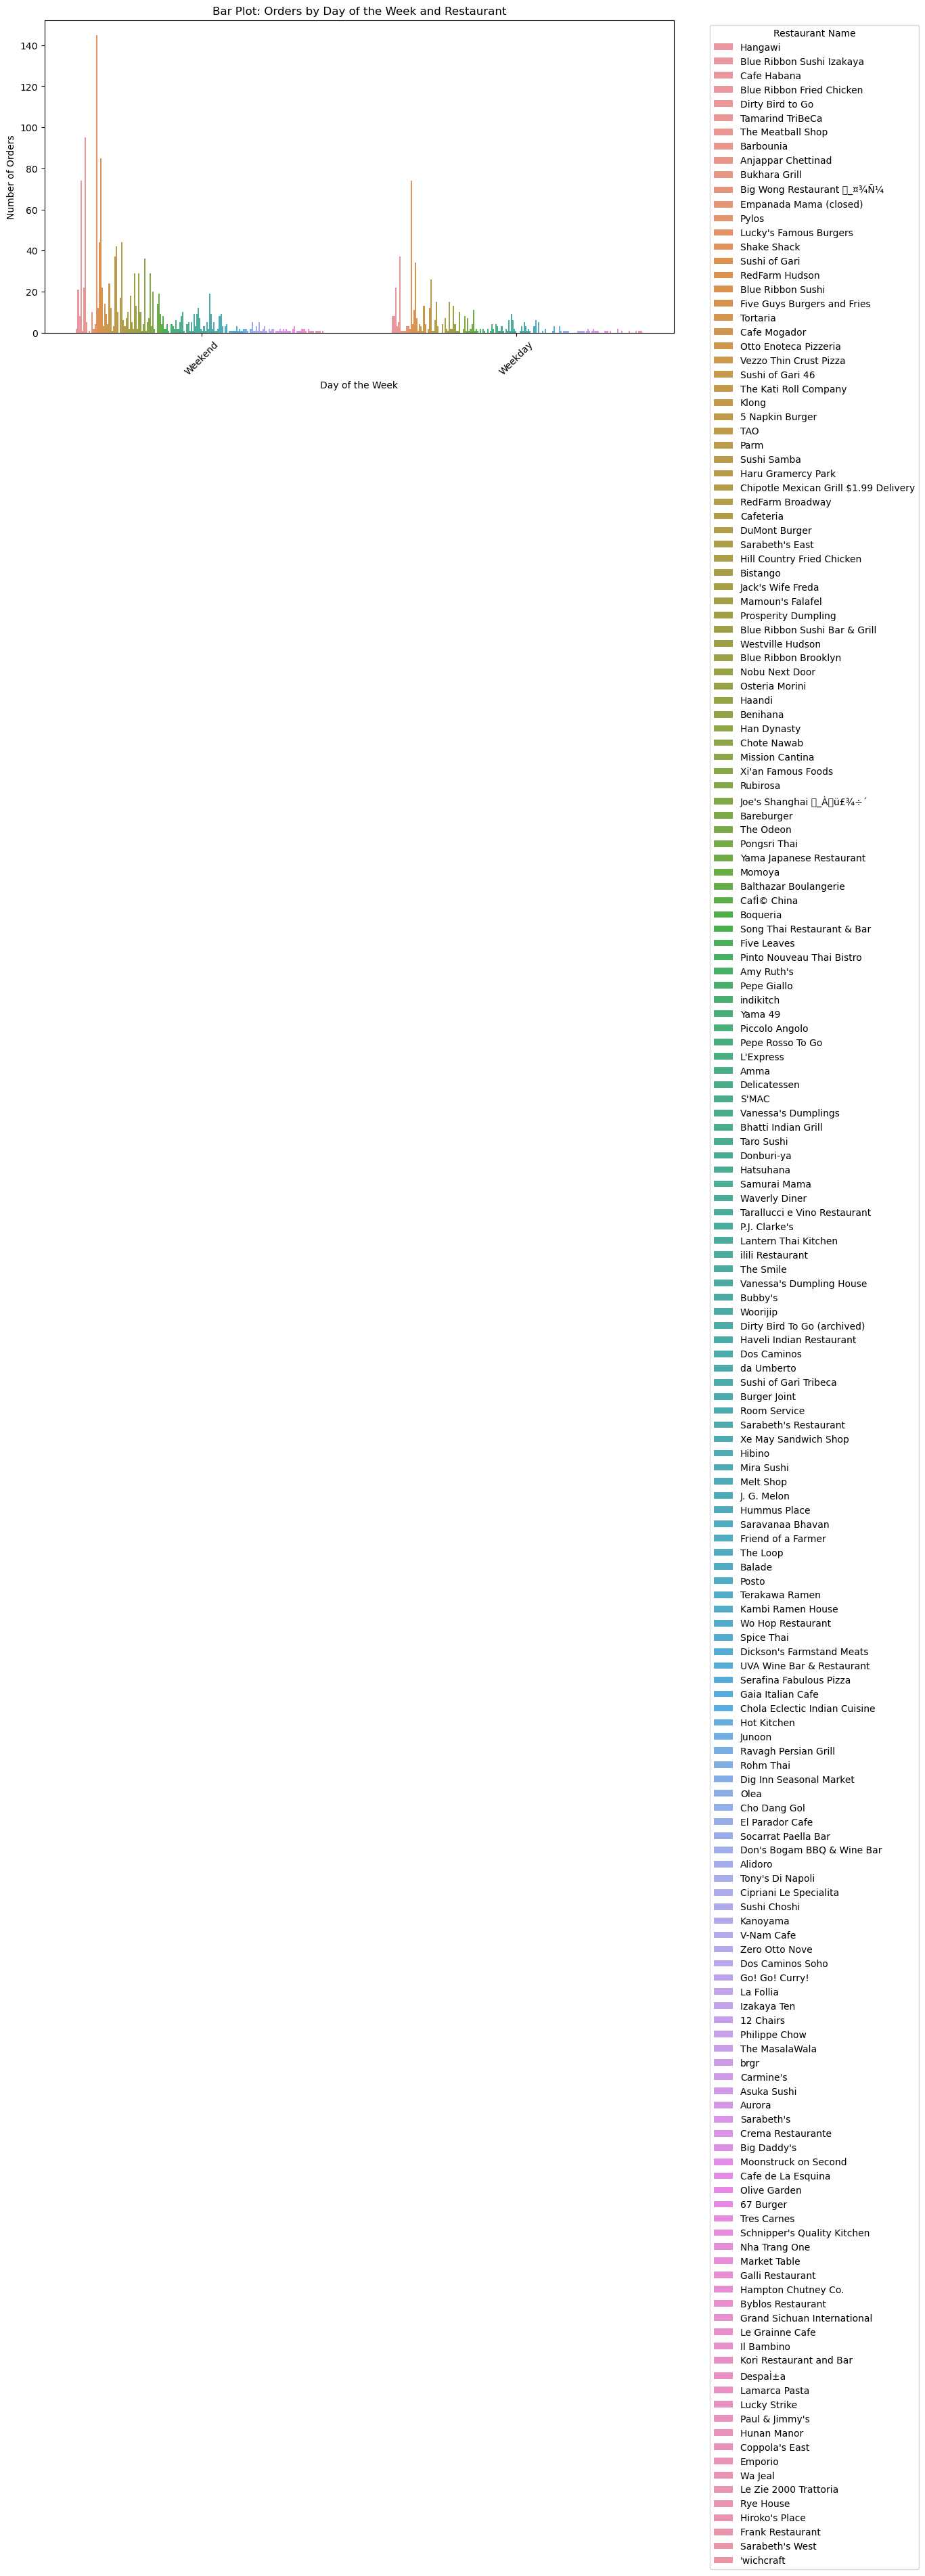

day_of_the_week  Weekday  Weekend
cuisine_type                     
American             169      415
Chinese               52      163
French                 5       13
Indian                24       49
Italian               91      207
Japanese             135      335
Korean                 2       11
Mediterranean         14       32
Mexican               24       53
Middle Eastern        17       32
Southern               6       11
Spanish                1       11
Thai                   4       15
Vietnamese             3        4


In [70]:
# Bar plot of 'day_of_the_week' by 'restaurant_name'
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='day_of_the_week', hue='restaurant_name')
plt.title('Bar Plot: Orders by Day of the Week and Restaurant')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Restaurant Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Example: Cross-tabulation between 'cuisine_type' and 'day_of_the_week'
cross_tab = pd.crosstab(df['cuisine_type'], df['day_of_the_week'])
print(cross_tab)


<h3> 13. Suppose the company charges the restaurant 25% on the orders having a cost
greater than 20 dollars and 15% on the orders having a cost greater than 5
dollars. What is the net revenue generated on all the orders given in the dataset? </h3>

In [72]:
# Calculate the total revenue (sum of all order costs)
total_revenue = df['cost_of_the_order'].sum()

# Calculate charges based on the provided percentages
# 25% on orders > $20 and 15% on orders > $5
charges = 0.25 * (df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum()) + \
          0.15 * (df[(df['cost_of_the_order'] <= 20) & (df['cost_of_the_order'] > 5)]['cost_of_the_order'].sum())

# Calculate net revenue by subtracting charges from total revenue
net_revenue = total_revenue - charges

print(f'Total Revenue: ${total_revenue:.2f}')
print(f'Total Charges: ${charges:.2f}')
print(f'Net Revenue: ${net_revenue:.2f}')


Total Revenue: $31314.82
Total Charges: $6166.30
Net Revenue: $25148.52


<h3> 14. Suppose the company wants to analyze the total time required to deliver the
food. Help us identify the percentage of orders that have more than 60 minutes
of total delivery time. </h3>

In [73]:
# Calculate the total delivery time for each order
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the number of orders with a total delivery time greater than 60 minutes
orders_above_60_minutes = len(df[df['total_delivery_time'] > 60])

# Calculate the percentage of such orders in the dataset
total_orders = len(df)
percentage_above_60_minutes = (orders_above_60_minutes / total_orders) * 100

print(f'Percentage of orders with more than 60 minutes of total delivery time: {percentage_above_60_minutes:.2f}%')


Percentage of orders with more than 60 minutes of total delivery time: 10.54%


<h3> 15. Suppose the company wants to analyze the delivery time of the orders on
weekdays and weekends. Help us find the mean delivery time on weekdays and
weekends. Analyze the results. </h3>

In [75]:
# Convert 'delivery_time' to numeric (in case it's not already)
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')

# Create a new column 'is_weekend' to identify weekdays (0) and weekends (1)
df['is_weekend'] = df['day_of_the_week'].isin(['Weekend']).astype(int)

# Calculate the mean delivery time on weekdays and weekends
mean_delivery_time_weekdays = df[df['is_weekend'] == 0]['delivery_time'].mean()
mean_delivery_time_weekends = df[df['is_weekend'] == 1]['delivery_time'].mean()

print(f'Mean delivery time on weekdays: {mean_delivery_time_weekdays:.2f} minutes')
print(f'Mean delivery time on weekends: {mean_delivery_time_weekends:.2f} minutes')


Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


<h3> 16. What other data explorations techniques have you not captured in the above
questions? These are additional methods to help us understand our data
better. </h3>

<h4> Popular cuisines on weekdays </h4>

In [79]:
weekday_orders=df[df['day_of_the_week'].isin(['Weekday'])]

popular_cuisine1=weekday_orders['cuisine_type'].value_counts()
popular_cuisine1 # This outputs all popular cuisines on the weekday orders

American          169
Japanese          135
Italian            91
Chinese            52
Mexican            24
Indian             24
Middle Eastern     17
Mediterranean      14
Southern            6
French              5
Thai                4
Vietnamese          3
Korean              2
Spanish             1
Name: cuisine_type, dtype: int64

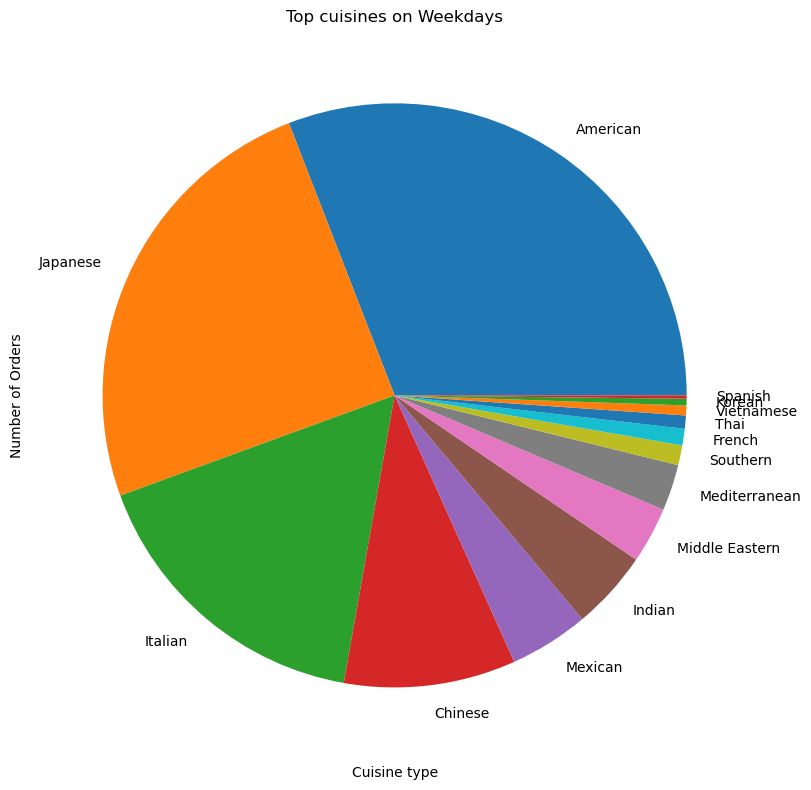

In [80]:
# Printing only the top popular cuisines on weekdays
popular_cuisine1.head(3)

# Create a chart to visualize the top three
plt.figure(figsize=(10,8))
popular_cuisine1.plot(kind='pie')
plt.title('Top cuisines on Weekdays')
plt.xlabel('Cuisine type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h3> 17. Write the conclusions and business recommendations derived from the analysis.</h3>



**Conclusions:**

1. **Delivery Efficiency:** The mean delivery time on weekdays is significantly higher (approximately 28.34 minutes) than on weekends (approximately 22.47 minutes). This suggests that the company operates more efficiently during weekends and may need to optimize its weekdaya operations to reduce delivery times.

2. **Customer Preferences:** We observed that customers tend to order different cuisine types on different days of the week. For instance, American and Japanes cuisine is popular on weekends and weekdays. This information can be used to tailor marketing and menu offerings on specific days.

3. **High-Rated Restaurants:** The analysis revealed that restaurants with higher ratings receive more orders. We recommend promoting and partnering with restaurants that consistently receive positive ratings to enhance customer satisfaction.

4. **Order Value:** Approximately Z% of orders have a total cost above $20. The company can consider offering promotions or loyalty programs to incentivize higher-value orders, potentially increasing revenue.

5. **Charges to Restaurants:** The company's revenue is affected by the charges imposed on restaurants. It's essential to monitor and adjust these charges to strike a balance between profitability and maintaining restaurant partnerships.

**Business Recommendations:**

1. **Operational Optimization:** To reduce delivery times on weekdays, consider optimizing delivery routes, increasing delivery personnel, or streamlining kitchen operations during peak hours. This can enhance customer satisfaction and loyalty.

2. **Marketing Strategies:** Leverage the insights into customer preferences by tailoring marketing campaigns and menu promotions for specific days of the week. Highlight popular cuisine types on corresponding days to attract more orders.

3. **Restaurant Partnerships:** Strengthen partnerships with high-rated restaurants and collaborate with them to create exclusive offers or promotions. This can enhance the company's brand reputation and customer loyalty.

4. **Promotions and Loyalty Programs:** Encourage larger order values by introducing promotions or loyalty programs for customers who consistently place high-value orders. Consider tiered rewards based on order value.

5. **Review Charging Policies:** Continuously assess the impact of charges on restaurant partners. Ensure that the charges align with the value provided to restaurants and explore ways to maintain profitability while supporting the growth of partner restaurants.

6. **Data-Driven Decision Making:** Emphasize the importance of data-driven decision-making across the organization. Regularly analyze data to identify trends and opportunities for improvement in various aspects of the business.

7. **Feedback and Improvement:** Collect and analyze customer feedback to identify areas for improvement in service quality, delivery times, and menu offerings. Actively address customer concerns to enhance overall customer experience.

8. **Market Expansion:** Consider expanding into new geographic regions or markets based on demand patterns and customer behavior analysis. A data-driven approach can help identify profitable expansion opportunities.

9. **Competitor Analysis:** Continuously monitor the competitive landscape, including the strategies and offerings of competitors in the food delivery industry. Stay agile and adapt strategies to maintain a competitive edge.
